### Classifier using five timesteps 
#### rows 0-4, ~54.8 years

In [1]:
import numpy as np
import pandas as pd

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.ensemble import GradientBoostingClassifier

In [2]:
planets = pd.read_csv('5ts.csv', skipinitialspace=True)
print(planets.columns)

Index(['run', 'planet', 'initial e', 'final e', 'mean e', 'min e', 'max e',
       'sd e', 'initial pericenter', 'final pericenter', 'mean pericenter',
       'min pericenter', 'max pericenter', 'sd pericenter', 'initial jacobi',
       'final jacobi', 'mean jacobi', 'min jacobi', 'max jacobi', 'sd jacobi',
       'initial mhr1', 'final mhr1', 'mean mhr1', 'min mhr1', 'max mhr1',
       'sd mhr1', 'initial mhr2', 'final mhr2', 'mean mhr2', 'min mhr2',
       'max mhr2', 'sd mhr2', 'initial a1_ratio', 'final a1_ratio',
       'mean a1_ratio', 'min a1_ratio', 'max a1_ratio', 'sd a1_ratio',
       'initial a2_ratio', 'final a2_ratio', 'mean a2_ratio', 'min a2_ratio',
       'max a2_ratio', 'sd a2_ratio', 'initial mass1_ratio',
       'final mass1_ratio', 'mean mass1_ratio', 'min mass1_ratio',
       'max mass1_ratio', 'sd mass1_ratio', 'initial mass2_ratio',
       'final mass2_ratio', 'mean mass2_ratio', 'min mass2_ratio',
       'max mass2_ratio', 'sd mass2_ratio', 'end time', 'fate'],


###### Classifies as type of instability (ejection, remaining, planet-planet collision, central body collision).

> Is currently ~61% accurate

In [ ]:
fates = list(set(planets['fate']))
types = {fates[i] : i for i in range(len(fates))}
int_dict = {i : fates[i] for i in range(len(fates))}
classes = planets['fate'].map(types)

###### Classifies as either stable or unstable.
> Is currently ~84% accurate

Second cell is the hard coded version

In [ ]:
fates = np.sort(list(set(planets['fate']))) [::-1]

types = {fates[i] : i for i in range(len(fates))}

classes = planets['fate'].map(types)

for i in range(len(classes)):
    if classes[i] == 0:
        pass
    else:
        classes[i] = 1

In [3]:
fates = list(set(planets['fate']))

types = {fates[i] : i for i in range(len(fates))}

classes = []

for i in range(len(planets['fate'])):
    if planets['fate'][i] == "remaining":
        classes += [0]
    else:
        classes += [1]
        
classes = np.array(classes)

###### Training

In [8]:
features_train, features_test, classes_train, classes_test = train_test_split(planets, classes, test_size=0.3, random_state=7)

ids_train = features_train['planet'].to_numpy()
features_train.drop(['run', 'planet', 'fate', 'end time'], axis=1, inplace=True)

cols = features_train.columns
features_train = features_train.to_numpy()

ids_test = features_test['planet'].to_numpy()
features_test.drop(['run', 'planet', 'fate', 'end time'], axis=1, inplace=True)
features_test = features_test.to_numpy()

/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [9]:
classifier = GradientBoostingClassifier(random_state=7)
classifier.fit(features_train, classes_train)

GradientBoostingClassifier(random_state=7)

In [10]:
classes_predict = classifier.predict( features_test )
print('Classifier is ', accuracy_score(classes_test, classes_predict) * 100, '% accurate on testing set' )

Classifier is  84.66666666666667 % accurate on testing set


###### Feature importances

In [11]:
feats=classifier.feature_importances_
inds=np.argsort(feats)[::-1]

for i in range(len(inds)):
    print(cols[inds[i]], feats[inds[i]])

sd e 0.18311689431442155
initial a2_ratio 0.12652875996018148
max mass2_ratio 0.06940353808370918
final mass2_ratio 0.05011586959789883
min a2_ratio 0.048209069385662176
initial jacobi 0.04062370636478477
sd pericenter 0.0394677940409864
initial mass1_ratio 0.03357377106754528
max a1_ratio 0.030934917087338358
max e 0.02331148225745414
mean mass2_ratio 0.02076333158633268
max mass1_ratio 0.020359683553575238
initial mhr1 0.018800747555132006
min pericenter 0.01760364516379051
mean mhr2 0.01745288100312368
max a2_ratio 0.017377205647887
mean mass1_ratio 0.016504268383066605
min mass1_ratio 0.015367532932599669
sd a1_ratio 0.013657539833522976
min e 0.012507033067727307
initial a1_ratio 0.012099192605849338
sd jacobi 0.011496766173771841
min mhr1 0.01095346620974539
initial mass2_ratio 0.010710725943638812
min mhr2 0.010635689221173701
min mass2_ratio 0.009819177453208804
sd mhr1 0.00906773386990548
mean e 0.009023738240594601
sd a2_ratio 0.008483958175805469
max mhr1 0.00812827571845023

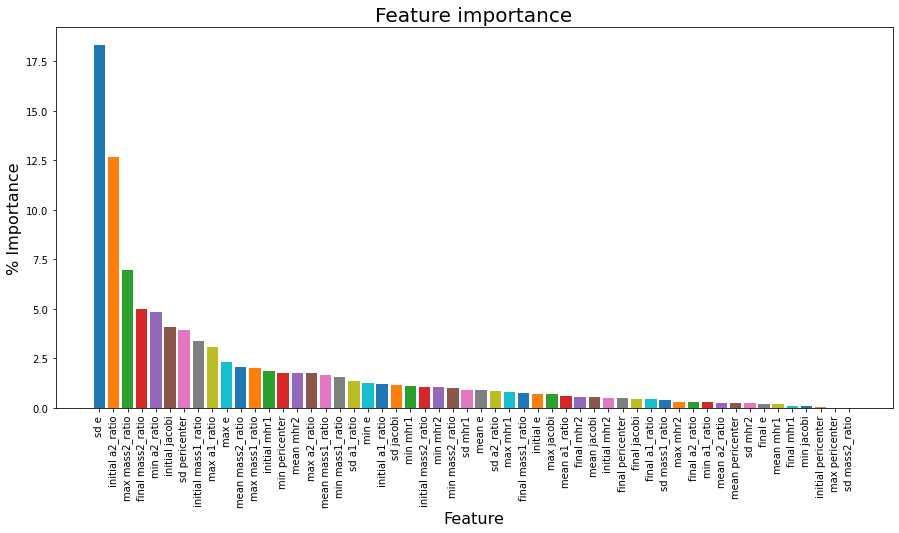

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pylab


f=plt.figure(figsize=(15,7))

for i in range(len(inds)):
    plt.bar(cols[inds[i]], feats[inds[i]] * 100)
    

 
plt.ylabel('% Importance', size=16)
plt.xlabel('Feature', size=16)
plt.title('Feature importance', size=20)
plt.xticks(rotation = 90)
plt.show()

Text(0.5, 1.0, 'Eccentricity standard deviation')

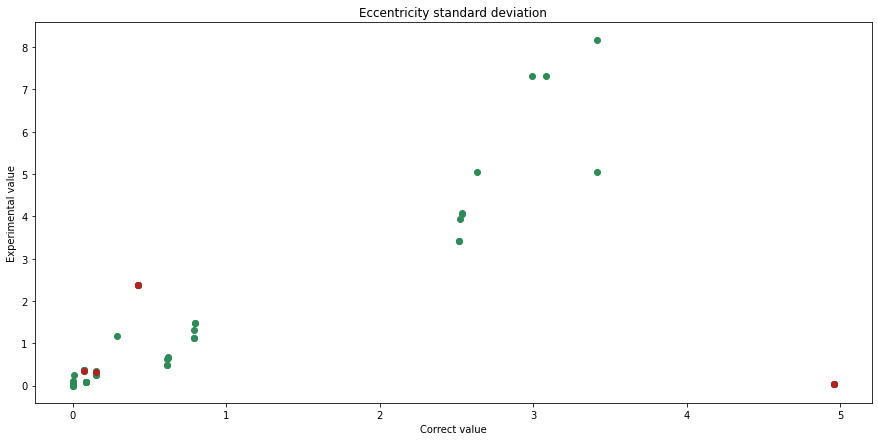

In [44]:
f=plt.figure(figsize=(15,7))


for i in range(0,54):
    if (classes_test[i] == classes_predict[i]):
        plt.scatter(features_test[5][i], features_train[5][i], color = 'seagreen')
    else:
        plt.scatter(features_test[5][i], features_train[5][i], color = 'firebrick', zorder = 2)
        
plt.ylabel('Experimental value')
plt.xlabel('Correct value')
plt.title('Eccentricity standard deviation')

Text(0.5, 1.0, 'Initial semi-major axis 2 ratio')

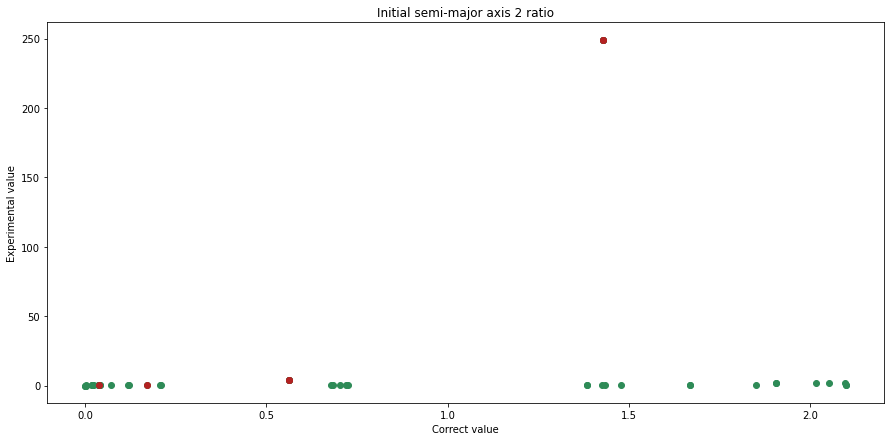

In [47]:
f=plt.figure(figsize=(15,7))


for i in range(0,54):
    if (classes_test[i] == classes_predict[i]):
        plt.scatter(features_test[36][i], features_train[36][i], color = 'seagreen')
    else:
        plt.scatter(features_test[36][i], features_train[36][i], color = 'firebrick', zorder = 2)
        
plt.ylabel('Experimental value')
plt.xlabel('Correct value')
plt.title('Initial semi-major axis 2 ratio')

Text(0.5, 1.0, 'sd e vs initial a2')

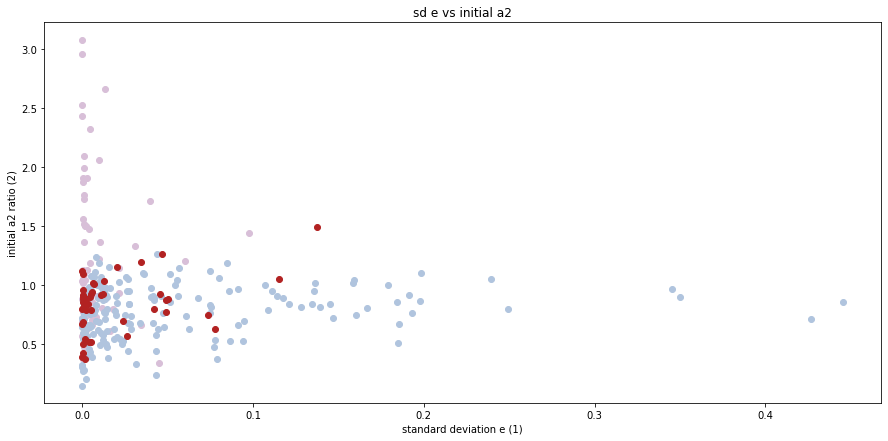

In [60]:
stable_x = []
unstable_x = []
misclassified_x = []
stable_y = []
unstable_y = []
misclassified_y = []
    
    
f=plt.figure(figsize=(15,7))

for i in range(len(features_test)):
    if (classes_test[i] == 0 and classes_predict[i] == 0):
        stable_x.append(features_test[i][5])
        stable_y.append(features_test[i][36])
    elif (classes_test[i] == 1 and classes_predict[i] == 1):
        unstable_x.append(features_test[i][5])
        unstable_y.append(features_test[i][36])
    else:
        misclassified_x.append(features_test[i][5])
        misclassified_y.append(features_test[i][36])

        
plt.scatter(stable_x, stable_y, color = 'thistle')
plt.scatter(misclassified_x, misclassified_y, color = 'firebrick', zorder = 2)
plt.scatter(unstable_x, unstable_y, color = 'lightsteelblue')

        
plt.ylabel('initial a2 ratio (2)')
plt.xlabel('standard deviation e (1)')
plt.title('sd e vs initial a2')